# Aim : Understanding the Impact of Feature Engineering and Application of Regualrization on the Regression Dataset

# Pre requisits: 
### Determine the Correlation values(To Determine the Colinearity) and Determine the VIF value ( MultiColinearity between independent features) 
### Detrmine the MSE for Train and Test Data seperately and conclude if the Model is Overfitting , Underfitting or Genrelized

# Data Info : Determine the MSE on Train and Test Data points and conclude if the model is Overfitting/ Underfitting/ Generalized Model 

Linear Regression - MSE on Train Data: 0.5179331255246699
Linear Regression - MSE on Test Data: 0.5558915986952438
Correlation of features with MedHouseValue:
MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: MedHouseValue, dtype: float64


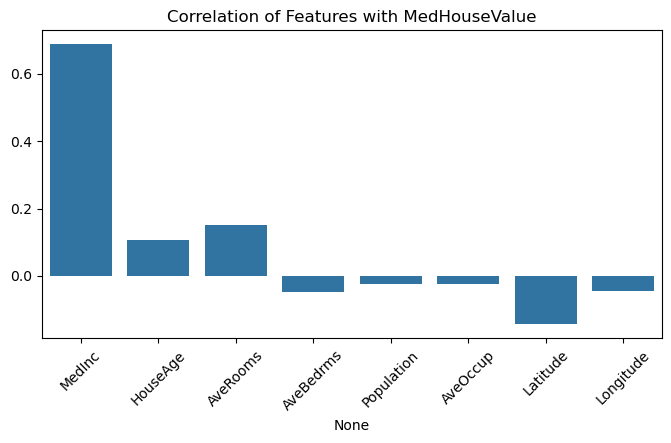

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


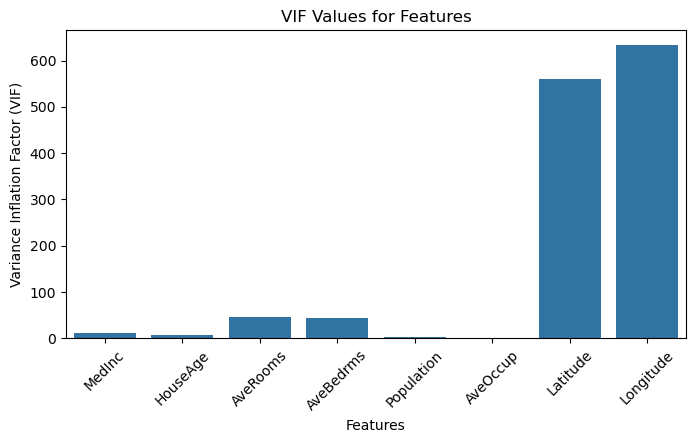

In [86]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Load the California Housing Dataset
housing = fetch_california_housing()

# 2. Create a DataFrame with the features and add the target feature
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

# 3. Split the data into training and testing sets
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on training and test datasets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate MSE for training and test datasets
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression - MSE on Train Data: {mse_train_lr}")
print(f"Linear Regression - MSE on Test Data: {mse_test_lr}")

# 5. Compute Correlation with Target Feature
correlation_with_target = df.corr()['MedHouseValue'][:-1]  # Exclude MedHouseValue itself
print("Correlation of features with MedHouseValue:")
print(correlation_with_target)

# Display the heatmap for the correlation with the target feature
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation of Features with MedHouseValue')
plt.xticks(rotation=45)
plt.show()

# Compute VIF (optional step to identify multicollinearity)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Plotting VIF values using a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=vif_data["feature"], y=vif_data["VIF"])
plt.title('VIF Values for Features')
plt.xticks(rotation=45)
plt.ylabel('Variance Inflation Factor (VIF)')
plt.xlabel('Features')
plt.show()


## Results :
MSE on Train Data: 0.5179
MSE on Test Data: 0.5559

MSE Values are Similar:

The train MSE (0.5179) and test MSE (0.5559) are fairly close to each other, which suggests that the model is generalizing well and not overfitting to the training data. If the MSE on the test set were significantly higher than on the training set, it would indicate overfitting (where the model performs well on the training data but poorly on unseen data).
Model Fit:

The MSE values themselves indicate the average squared difference between the predicted values and the actual values in the dataset. A smaller MSE suggests better model performance. In this case, while the values are not extremely high, they do indicate that the model has some error in its predictions.
No Severe Overfitting or Underfitting:

Since the training error (0.5179) and test error (0.5559) are quite close, it implies the model has struck a decent balance and is not significantly overfitting (low training error, high test error) or underfitting (high error on both).

## Suggestions :
### Further Tuning:
Although the performance is reasonable, you could potentially improve it by experimenting with feature engineering, applying regularization methods (such as Ridge or Lasso regression), or by tuning the model further.
### Check for Assumptions:
You should also check the assumptions of linear regression (such as linearity, homoscedasticity, and multicollinearity) to ensure that the model is appropriate for this problem.

# Case 1 : Feature Selection and Regualarization by Applying Elastic Net Regression 

Linear Regression - MSE Before Elastic Net: 0.5558915986952438
Elastic Net - MSE After: 1.0442308546929173


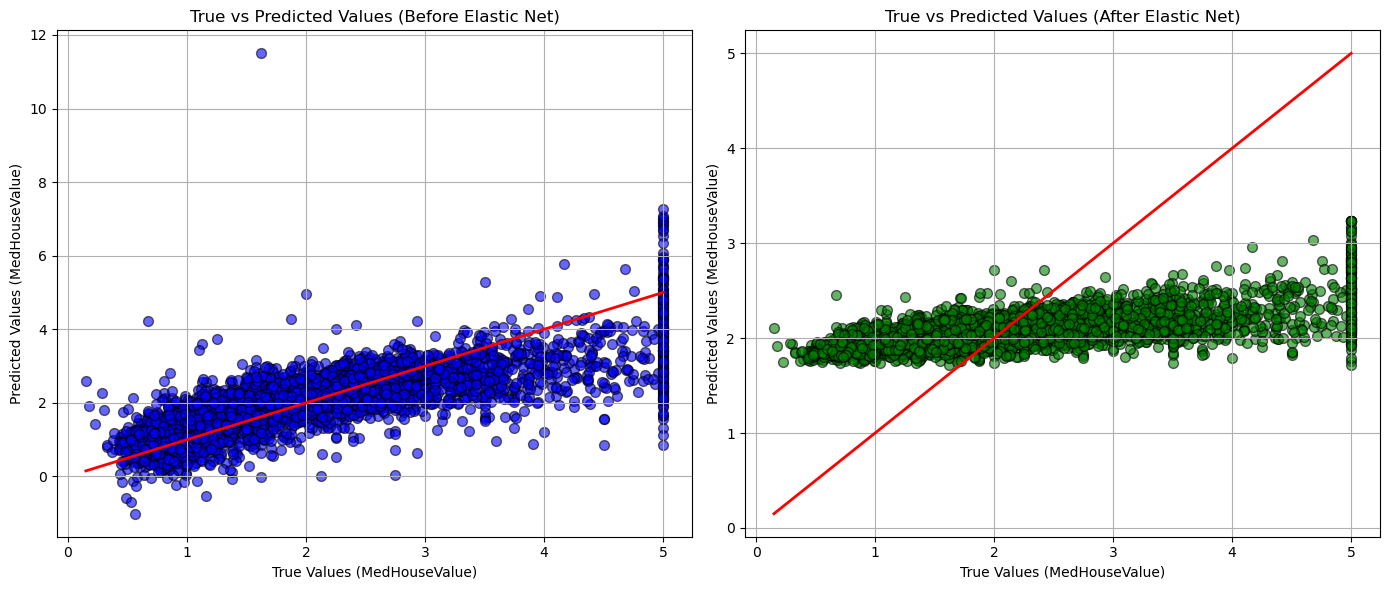

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the California Housing Dataset
housing = fetch_california_housing()

# 2. Create a DataFrame with the features and add the target feature
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

# 3. Split the data into training and testing sets
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Linear Regression model (Before Elastic Net)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred_lr = lr.predict(X_test)

# Calculate MSE for Linear Regression
mse_before = mean_squared_error(y_test, y_test_pred_lr)
print(f"Linear Regression - MSE Before Elastic Net: {mse_before}")

# 5. Train an Elastic Net Regression model (After Feature Selection)
scaler = StandardScaler()  # Scale the features for ElasticNet
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_test_pred_en = elastic_net.predict(X_test_scaled)

# Calculate MSE for Elastic Net
mse_after = mean_squared_error(y_test, y_test_pred_en)
print(f"Elastic Net - MSE After: {mse_after}")

# 6. Plot: True vs Predicted Values Before Elastic Net (Linear Regression)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lr, color='blue', edgecolor='black', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Best fit line
plt.title('True vs Predicted Values (Before Elastic Net)')
plt.xlabel('True Values (MedHouseValue)')
plt.ylabel('Predicted Values (MedHouseValue)')
plt.grid(True)

# 7. Plot: True vs Predicted Values After Elastic Net
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_en, color='green', edgecolor='black', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Best fit line
plt.title('True vs Predicted Values (After Elastic Net)')
plt.xlabel('True Values (MedHouseValue)')
plt.ylabel('Predicted Values (MedHouseValue)')
plt.grid(True)

# Show the comparison plots
plt.tight_layout()
plt.show()


# Case 2 : Applying on Regularization on the Dataset without Appying the Feature Selection for imporving the model performance 
Here we have to apply Ridge Regression whic will retain all the features but will dampen the impacts of the irrelevant features 
Ignoring the application of Lasso Regression which can lead to elimination of the irrelevant or High Multicorrelated Features 

Correlation of features with MedHouseValue:
MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64
MSE Before Regularization (Linear Regression): 0.5558915986952438
MSE After Regularization (Ridge): 0.5558034669932213
MSE After Regularization (Lasso): 0.9380337514945428


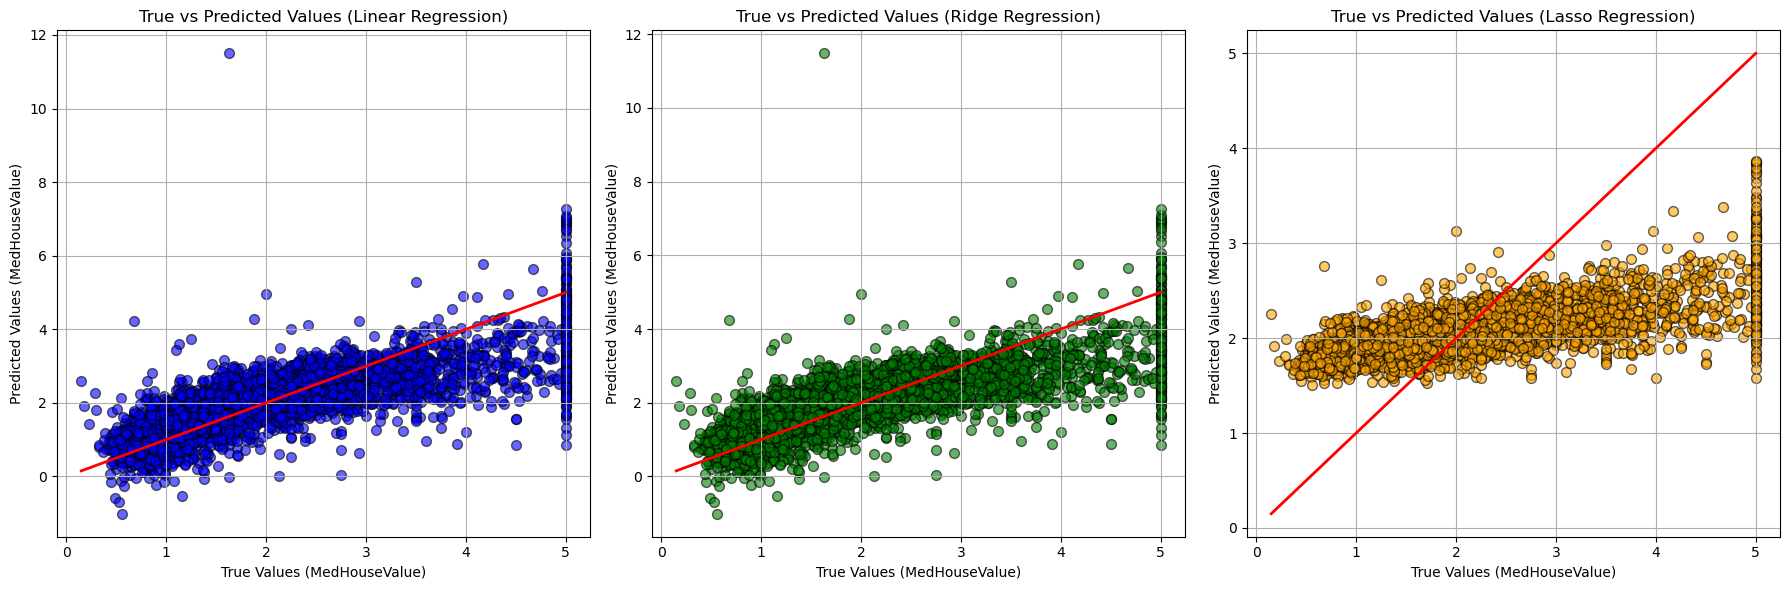

In [98]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the California Housing Dataset
housing = fetch_california_housing()

# 2. Create a DataFrame with the features and add the target feature
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

# 3. Split the data into training and testing sets
X = df.drop('MedHouseValue', axis=1)  # Keep all features
y = df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Linear Regression model (before regularization)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_before = lr.predict(X_test)
mse_lr_before = mean_squared_error(y_test, y_pred_lr_before)

# 5. Train a Ridge Regression model (with all features)
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge_after = ridge.predict(X_test)
mse_ridge_after = mean_squared_error(y_test, y_pred_ridge_after)

# 6. Train a Lasso Regression model (with all features)
lasso = Lasso(alpha=1.0)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso_after = lasso.predict(X_test)
mse_lasso_after = mean_squared_error(y_test, y_pred_lasso_after)

# 7. Display correlation of each feature with the target feature
correlation_with_target = df.corr()['MedHouseValue'].sort_values(ascending=False)
print("Correlation of features with MedHouseValue:")
print(correlation_with_target)

# 8. Display MSE results
print(f"MSE Before Regularization (Linear Regression): {mse_lr_before}")
print(f"MSE After Regularization (Ridge): {mse_ridge_after}")
print(f"MSE After Regularization (Lasso): {mse_lasso_after}")

# 9. Plot: True vs Predicted Values Before Regularization (Linear Regression)
plt.figure(figsize=(18, 6))

# Subplot 1: Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr_before, color='blue', edgecolor='black', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Best fit line
plt.title('True vs Predicted Values (Linear Regression)')
plt.xlabel('True Values (MedHouseValue)')
plt.ylabel('Predicted Values (MedHouseValue)')
plt.grid(True)

# 10. Plot: True vs Predicted Values After Regularization (Ridge)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge_after, color='green', edgecolor='black', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Best fit line
plt.title('True vs Predicted Values (Ridge Regression)')
plt.xlabel('True Values (MedHouseValue)')
plt.ylabel('Predicted Values (MedHouseValue)')
plt.grid(True)

# 11. Plot: True vs Predicted Values After Regularization (Lasso)
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso_after, color='orange', edgecolor='black', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Best fit line
plt.title('True vs Predicted Values (Lasso Regression)')
plt.xlabel('True Values (MedHouseValue)')
plt.ylabel('Predicted Values (MedHouseValue)')
plt.grid(True)

# Show the comparison plots
plt.tight_layout()
plt.show()


## Overall Conclusions:
### Ridge regression is beneficial in this case, but the improvement is minor. Ridge adds a penalty on the magnitude of coefficients without drastically changing the model.
### Lasso regression, however, has likely led to underfitting by eliminating too many features, thus increasing the error.
### Based on these results, Ridge appears to be a better regularization choice for this specific dataset, while Lasso may not be ideal without further tuning (such as adjusting the regularization parameter alpha).